In [1]:
####### dropout resnet18 vs without dropout
#### 
import torch
import sys
sys.path.append("..")
import numpy as np

TAR_PATH = "/home/yifan/Exp/Mutation/0.5/experiment1"
REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"

ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis2'

DEVICE='cuda:1'
########## initulize reference data and target data
from AlignVis.DataInit import DataInit
REF_EPOCH = 200
TAR_EPOCH = 200
tar_datainit = DataInit(TAR_PATH,TAR_PATH,TAR_EPOCH,DEVICE)
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH,DEVICE)

ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from AlignVis.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(18,0.8,0.3,0.05)


from AlignVis_Visualizer.visualizer import visualizer
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 447.12it/s]


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8299.31it/s]


absolute alignment indicates number: 178 label diff indicates number: 13 confidence diff indicates number: 12 high distance number: 8


In [17]:
from AlignVis.autoencoder_generator import AutoEncoderGenerator
AutoEncoder_Generator = AutoEncoderGenerator(REF_PATH, REF_PATH, TAR_PATH, TAR_PATH, 200,200, projector, DEVICE)
import os
if os.path.exists(os.path.join(TAR_PATH, "pre_autoencoder_init.npy")):
    print("continue")
    autoencoder = AutoEncoder_Generator.encoder_trainer_with_pre_trained(os.path.join(TAR_PATH, "pre_autoencoder_init.npy"), os.path.join(TAR_PATH, "pre_autoencoder_init.npy"),batch_size=500,num_epochs=15,learning_rate=1e-2)
else:
    print("new one")
    autoencoder = AutoEncoder_Generator.encoder_trainer(os.path.join(TAR_PATH, "pre_autoencoder_init.npy"),batch_size=500,num_epochs=10)

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 7959.98it/s]


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8308.97it/s]


continue
NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8222.13it/s]


NET resnet18
Finish initialization...


100%|██████████| 3/3 [00:00<00:00, 7663.16it/s]


Epoch [1/15], Loss: 3.9969, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 137.41470336914062,pred_loss:1.6053321361541748,loss_contrastive100.49245273590088,cka_loss0.010654807090759277


100%|██████████| 3/3 [00:00<00:00, 5311.49it/s]


Epoch [2/15], Loss: 4.0744, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 138.25706481933594,pred_loss:1.5960233211517334,loss_contrastive108.33744999694824,cka_loss0.010580778121948242


100%|██████████| 3/3 [00:00<00:00, 7602.97it/s]


Epoch [3/15], Loss: 3.3758, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 137.83126831054688,pred_loss:1.4321540594100952,loss_contrastive55.28092208862304,cka_loss0.01064378023147583


100%|██████████| 3/3 [00:00<00:00, 6144.00it/s]


Epoch [4/15], Loss: 3.0979, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 141.18434143066406,pred_loss:1.3860963582992554,loss_contrastive28.802322204589842,cka_loss0.01010197401046753


100%|██████████| 3/3 [00:00<00:00, 4636.30it/s]


Epoch [5/15], Loss: 3.5213, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 139.3768310546875,pred_loss:1.3777889013290405,loss_contrastive73.76289558410645,cka_loss0.010314702987670898


100%|██████████| 3/3 [00:00<00:00, 4679.40it/s]


Epoch [6/15], Loss: 4.0463, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 139.80035400390625,pred_loss:1.315321922302246,loss_contrastive132.10556954956056,cka_loss0.010064423084259033


100%|██████████| 3/3 [00:00<00:00, 7349.83it/s]


Epoch [7/15], Loss: 3.2910, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 138.65084838867188,pred_loss:1.2736479043960571,loss_contrastive61.87819598388672,cka_loss0.01025998592376709


100%|██████████| 3/3 [00:00<00:00, 5260.41it/s]


Epoch [8/15], Loss: 3.1985, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 142.7599639892578,pred_loss:1.2550755739212036,loss_contrastive50.39255598449707,cka_loss0.010088920593261719


100%|██████████| 3/3 [00:00<00:00, 4012.41it/s]


Epoch [9/15], Loss: 2.8967, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 135.05624389648438,pred_loss:1.2753636837005615,loss_contrastive25.817053421020507,cka_loss0.010795652866363525


100%|██████████| 3/3 [00:00<00:00, 6671.75it/s]


Epoch [10/15], Loss: 3.6583, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 139.75782775878906,pred_loss:1.2388629913330078,loss_contrastive100.99698419189453,cka_loss0.01010197401046753


100%|██████████| 3/3 [00:00<00:00, 4936.41it/s]


Epoch [11/15], Loss: 3.2465, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 138.8917236328125,pred_loss:1.2212104797363281,loss_contrastive62.43677013397217,cka_loss0.010204136371612549


100%|██████████| 3/3 [00:00<00:00, 6390.51it/s]


Epoch [12/15], Loss: 3.3754, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 140.58267211914062,pred_loss:1.1991888284683228,loss_contrastive75.87365507507324,cka_loss0.009869277477264404


100%|██████████| 3/3 [00:00<00:00, 7849.60it/s]


Epoch [13/15], Loss: 3.1374, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 140.1068115234375,pred_loss:1.2166669368743896,loss_contrastive50.760254928588864,cka_loss0.010263144969940186


100%|██████████| 3/3 [00:00<00:00, 7639.90it/s]


Epoch [14/15], Loss: 3.0624, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 140.46835327148438,pred_loss:1.1816561222076416,loss_contrastive46.432931198120116,cka_loss0.010002970695495605


100%|██████████| 3/3 [00:00<00:00, 7177.93it/s]

Epoch [15/15], Loss: 3.1605, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 142.60000610351562,pred_loss:1.159762978553772,loss_contrastive56.29607458496094,cka_loss0.010061860084533691


Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 8408.65it/s]


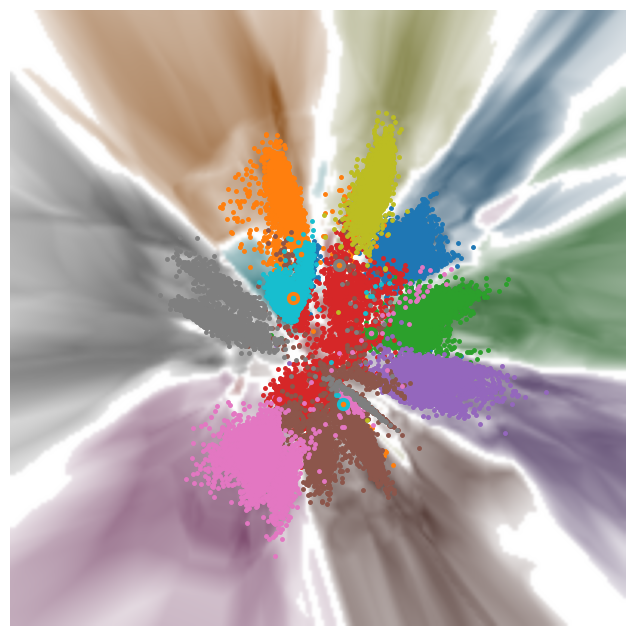

In [18]:
##### visuallize all data
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
Y = torch.Tensor(tar_provider.train_representation(TAR_EPOCH))
encoded_Y = autoencoder.encoder(Y)
I = np.eye(512)
from AlignVis_Visualizer.visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, ref_provider, autoencoder, np.dot(encoded_Y.detach().numpy(), I), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join(TAR_PATH, "vis.png"))

In [4]:
from AlignVis_eval.AlignEval import Evaluator
eval = Evaluator(projector,ref_provider,tar_provider,REF_EPOCH,TAR_EPOCH)
# eval.eval_boundary_nn_autoencoder(tar_border_centers, autoencoder)

In [19]:
eval.eval_nn_train_autoencoder(15,autoencoder)

Thu May 11 23:41:34 2023 Building RP forest with 16 trees
Thu May 11 23:41:34 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Thu May 11 23:41:36 2023 Building RP forest with 16 trees
Thu May 11 23:41:36 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for autoencoder: 1.25/15 in epoch 200


1.25482

In [20]:
eval.eval_ppr_autoencoder(autoencoder)

100%|██████████| 250/250 [00:00<00:00, 8416.96it/s]

#train# autoencoder PPR: 0.94 in epoch 200


0.93586

In [11]:

####### generate boundary ponits for tar and ref respectively
from AlignVis.AlignmentBoundaryGenerator import AlignmentBoundaryGenerator
BoundaryGen = AlignmentBoundaryGenerator(REF_PATH,REF_PATH,TAR_PATH,TAR_PATH,REF_EPOCH,TAR_EPOCH,DEVICE)
ref_boundary,tar_boundary = BoundaryGen.get_boundary_point(DEVICE,num_adv_eg=2000)
import torch
###### get border sample features
import torch.nn as nn

ref_feature_model = ref_model.to(DEVICE)
ref_feature_model = nn.Sequential(*list(ref_feature_model.children())[:-1])
with torch.no_grad():
    features = ref_feature_model(ref_boundary)
    ref_features = features.view(ref_boundary.shape[0], -1).cpu().numpy()

###### get border sample features
tar_feature_model = tar_model.to(DEVICE)
tar_feature_model = nn.Sequential(*list(tar_feature_model.children())[:-1])
with torch.no_grad():
    tar_features = tar_feature_model(tar_boundary)
    tar_features = tar_features.view(tar_boundary.shape[0], -1).cpu().numpy()

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 7655.18it/s]

NET resnet18


Finish initialization...


100%|██████████| 250/250 [00:36<00:00,  6.94it/s]


conf1 (5000, 10) (4997, 10) (5000, 10) (4997, 10)
conf1 (4996, 10) (5000, 10) (4996, 10) (5000, 10)
conf1 (5000, 10) (5000, 10) (5000, 10) (5000, 10)
conf1 (4999, 10) (4998, 10) (4999, 10) (4998, 10)
conf1 (5000, 10) (4996, 10) (5000, 10) (4996, 10)
conf1 (5000, 10) (4997, 10) (5000, 10) (4997, 10)
conf1 (5000, 10) (4999, 10) (5000, 10) (4999, 10)
conf1 (4998, 10) (4997, 10) (4998, 10) (4997, 10)
conf1 (5000, 10) (4998, 10) (5000, 10) (4998, 10)
conf1 (4996, 10) (5000, 10) (4996, 10) (5000, 10)
conf1 (5000, 10) (4998, 10) (5000, 10) (4998, 10)
conf1 (5000, 10) (5000, 10) (5000, 10) (5000, 10)
conf1 (5000, 10) (5000, 10) (5000, 10) (5000, 10)
conf1 (5000, 10) (4998, 10) (5000, 10) (4998, 10)
conf1 (5000, 10) (4998, 10) (5000, 10) (4998, 10)
conf1 (5000, 10) (5000, 10) (5000, 10) (5000, 10)
conf1 (4999, 10) (4998, 10) (4999, 10) (4998, 10)
conf1 (5000, 10) (4996, 10) (5000, 10) (4996, 10)
conf1 (5000, 10) (4996, 10) (5000, 10) (4996, 10)
conf1 (5000, 10) (5000, 10) (5000, 10) (5000, 10)


In [21]:
eval.eval_boundary_nn_ref_in_ref(ref_features,15)

NameError: name 'ref_features' is not defined

In [22]:
eval.eval_boundary_nn_autoencoder(tar_features, autoencoder)

NameError: name 'tar_features' is not defined

In [23]:
from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()
encoded_Y = autoencoder.encoder(torch.Tensor(tar_train_data))
encoded_Y = encoded_Y.detach().numpy()
# indicates = np.random.choice(aligned, size=10, replace=False)
indicates = np.random.choice(np.arange(5000), size=1000, replace=False)
print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(tar_train_data[indicates],encoded_Y[indicates]))

CKA between absolute alignmnet subset is: 0.990816923483608


In [24]:
eval.eval_move_direction_preserving(autoencoder,10,1.5)

100%|██████████| 250/250 [00:00<00:00, 8407.51it/s]


long distance move subet number is 1487, short distance move set number is 910


100%|██████████| 250/250 [00:00<00:00, 8378.55it/s]


all reference distance preserving 49409/50000
all target distance preserving 49305/50000
short distance move direction preserving 891/910
long distance move direction preserving 1460/1487


In [25]:
val_same, val_diff = eval.eval_prediction_preserving(autoencoder)

100%|██████████| 250/250 [00:00<00:00, 8387.33it/s]

refere  predction preserving:46512/50000 0.93
target  predction preserving:46793/50000 0.94
ref&tar pred_same preserving:44552/49987 0.89
ref&tar pred_diff preserving:5/13 0.38


In [36]:
from AlignVis.AlignmentBoundaryGenerator import AlignmentBoundaryGenerator
BoundaryGen = AlignmentBoundaryGenerator(REF_PATH,TAR_PATH,REF_PATH,TAR_PATH,REF_EPOCH,TAR_EPOCH,DEVICE)
ref_b_features,tar_b_features = BoundaryGen.get_boundary_features(DEVICE,num_adv_eg=1000)

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 761.86it/s] 


NET resnet18
Finish initialization...


 23%|██▎       | 58/250 [00:31<01:43,  1.86it/s]


KeyboardInterrupt: 

In [28]:
import os
location_R = os.path.join(TAR_PATH, "Model","Epoch_{:d}".format(TAR_EPOCH), "aligned_ref_border.npy")
location_T = os.path.join(TAR_PATH, "Model","Epoch_{:d}".format(TAR_EPOCH), "aligned_tar_border.npy")
np.save(location_R, ref_features)
np.save(location_T, tar_features)

In [26]:
ref_border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_ref_border.npy")
ref_b_features = np.load(ref_border_centers_loc).squeeze()

In [27]:
tar_border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_tar_border.npy")
tar_b_features = np.load(tar_border_centers_loc).squeeze()

In [28]:
eval.eval_boundary_nn_ref_in_ref(ref_b_features)

#train# boundary preserving: 1.49/15 in epoch 200


1.4875

In [29]:
eval.eval_boundary_nn_autoencoder(tar_b_features,autoencoder,15)

#train# boundary preserving: 1.45/15 in epoch 200


1.45416

In [30]:
def eval_boundary_align_sensitivity(autoencoder, tar_b_features, ref_b_features):
        ############## init ###################
        #init target
        print("123")
        tar_b_pred = tar_provider.get_pred(TAR_EPOCH, tar_b_features)
        tar_b_pred = tar_b_pred + 1e-8
        tar_sort_preds = np.sort(tar_b_pred, axis=1)
        tar_diff = (tar_sort_preds[:, -1] - tar_sort_preds[:, -2]) / (tar_sort_preds[:, -1] - tar_sort_preds[:, 0])
        tar_border = np.zeros(len(tar_diff), dtype=np.uint8) + 0.05
        tar_border[tar_diff < 0.15] = 1

        #init reference
        ref_b_pred = ref_provider.get_pred(REF_EPOCH, ref_b_features)
        ref_b_pred = ref_b_pred + 1e-8
        ref_sort_preds = np.sort(ref_b_pred, axis=1)
        ref_diff = (ref_sort_preds[:, -1] - ref_sort_preds[:, -2]) / (ref_sort_preds[:, -1] - ref_sort_preds[:, 0])
        ref_border = np.zeros(len(ref_diff), dtype=np.uint8) + 0.05
        ref_border[ref_diff < 0.15] = 1
        
        ##### get all boundary list
        all_boundary_list = []
        
        for i in range(len(ref_border)):
            if ref_border[i] == 1 and tar_border[i] == 1:
                all_boundary_list.append(i)
        print(len(all_boundary_list))
        #### get ref low dimensional border
        ref_b_embedding = projector.batch_project(REF_EPOCH, ref_b_features)
        ref_b_inv = projector.batch_inverse(REF_EPOCH,ref_b_embedding)
        ref_b_pred_l = ref_provider.get_pred(REF_EPOCH, ref_b_inv)
        ref_b_pred_l = ref_b_pred_l  + 1e-8
        ref_sort_preds_l  = np.sort(ref_b_pred_l , axis=1)
        ref_diff_l  = (ref_sort_preds_l[:, -1] - ref_sort_preds_l[:, -2]) / (ref_sort_preds_l[:, -1] - ref_sort_preds_l[:, 0])
        ref_border_l = np.zeros(len(ref_diff_l), dtype=np.uint8) + 0.05
        ref_border_l[ref_diff_l < 0.15] = 1
        
        #### get target low dimensional border
        tar_b_embedding = projector.batch_project(REF_EPOCH, autoencoder.encoder(torch.Tensor(ref_b_features)).detach().numpy())
        tar_b_inv = projector.batch_inverse(REF_EPOCH,tar_b_embedding)
        tar_b_inv = autoencoder.decoder(torch.Tensor(tar_b_inv)).detach().numpy()
        tar_b_pred_l = tar_provider.get_pred(REF_EPOCH, tar_b_inv)
        tar_b_pred_l = tar_b_pred_l  + 1e-8
        tar_sort_preds_l  = np.sort(tar_b_pred_l , axis=1)
        tar_diff_l  = (tar_sort_preds_l[:, -1] - tar_sort_preds_l[:, -2]) / (tar_sort_preds_l[:, -1] - tar_sort_preds_l[:, 0])
        tar_border_l = np.zeros(len(tar_diff_l), dtype=np.uint8) + 0.05
        tar_border_l[tar_diff_l < 0.15] = 1

        all_boundary_list_l = []
       
        all_change = []
        all_change_l=[]
      
        for i in range(len(ref_border)):
            ##### low dimension all border
            if ref_border_l[i] == 1 and tar_border_l[i] == 1:
                all_boundary_list_l.append(i)
            if ref_border[i] != tar_border[i]:
                 all_change.append(i)
            if ref_border[i] != tar_border[i] and tar_border_l[i] == tar_border[i]:
                 all_change_l.append(i)
                 
                 
           


        print("boundary sample preserving{}/{}".format(len(all_boundary_list_l),len(all_boundary_list)))
        print("boundary change preserving{}/{}".format(len(all_change_l),len(all_change)))
       
eval_boundary_align_sensitivity(autoencoder,np.concatenate((tar_train_data,tar_b_features),axis=0), np.concatenate((ref_train_data,ref_b_features),axis=0))      

123


100%|██████████| 260/260 [00:00<00:00, 8205.68it/s]

2023



100%|██████████| 260/260 [00:00<00:00, 8202.04it/s]

boundary sample preserving719/2023
boundary change preserving266/555


In [32]:
eval.eval_move_direction_preserving(autoencoder,10,1.5)

100%|██████████| 250/250 [00:00<00:00, 8458.17it/s]


long distance move subet number is 1487, short distance move set number is 910


100%|██████████| 250/250 [00:00<00:00, 8091.74it/s]


all reference distance preserving 49409/50000
all target distance preserving 48868/50000
short distance move direction preserving 881/910
long distance move direction preserving 1451/1487


In [31]:
val_same, val_diff = eval.eval_prediction_preserving(autoencoder)

100%|██████████| 250/250 [00:00<00:00, 8342.62it/s]

refere  predction preserving:46512/50000 0.93
target  predction preserving:46793/50000 0.94
ref&tar pred_same preserving:44552/49987 0.89
ref&tar pred_diff preserving:5/13 0.38
